In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_df = pd.read_csv("./data/credit_train.csv")

credit_df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,52372,M,38,MAR,SPC,"12168,00",10,1.1,"0,308454",GRD,ОБЛ ВОЛОГОДСКАЯ,25000.0,0.0,0.0,0
1,75213,F,36,MAR,SPC,"17738,00",10,1.1,"0,498147",GRD,ОБЛ БЕЛГОРОДСКАЯ,25000.0,4.0,0.0,0
2,119931,M,23,UNM,SPC,"26489,00",10,1.1,"0,431980",SCH,ЧЕЛЯБИНСКАЯ ОБЛ,25000.0,NaN,NaN,0
3,134365,M,24,UNM,SPC,"20379,00",12,1.6,"0,770546",GRD,РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ,50000.0,NaN,NaN,1
4,138695,F,47,MAR,SPC,"12019,00",10,1.6,"0,617275",SCH,УЛЬЯНОВСКАЯ ОБЛ,18000.0,0.0,0.0,0


In [18]:
credit_df.shape

(136596, 15)

In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136596 entries, 0 to 136595
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             136596 non-null  int64  
 1   gender                136596 non-null  object 
 2   age                   136596 non-null  int64  
 3   marital_status        136596 non-null  object 
 4   job_position          136596 non-null  object 
 5   credit_sum            136596 non-null  object 
 6   credit_month          136596 non-null  int64  
 7   tariff_id             136596 non-null  float64
 8   score_shk             136596 non-null  object 
 9   education             136596 non-null  object 
 10  living_region         136442 non-null  object 
 11  monthly_income        136595 non-null  float64
 12  credit_count          129231 non-null  float64
 13  overdue_credit_count  129231 non-null  float64
 14  open_account_flg      136596 non-null  int64  
dtype

In [3]:
""" Renaming the target column """
credit_df = credit_df.rename(columns={"open_account_flg" : "target"})

In [4]:
credit_df["credit_sum"] = credit_df["credit_sum"].str.replace(",","")
credit_df["credit_sum"] = credit_df["credit_sum"].astype(float)

credit_df["score_shk"] = credit_df["score_shk"].str.replace(",", ".")
credit_df["score_shk"] = credit_df["score_shk"].astype(float)

In [5]:
credit_df["gender"] = credit_df["gender"].apply(lambda x: 1 if x == "M" else 0)
credit_df["marital_status"] = credit_df["marital_status"].apply(lambda x: 1 if x == 'MAR' else 2 if x == 'UNM' else 3 if x == 'DIV' else 4 if x == 'CIV' else 0)
credit_df["education"] = credit_df["education"].apply(lambda x: 1 if x == 'GRD' else 2 if x == 'SCH' else 3 if x == 'UGR' else 4 if x == 'PGR' else 0)


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

credit_df["job_position"] = encoder.fit_transform(credit_df["job_position"])

In [7]:
credit_df = credit_df.drop(['client_id', 'tariff_id', 'living_region'],axis=1)

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136596 entries, 0 to 136595
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                136596 non-null  int64  
 1   age                   136596 non-null  int64  
 2   marital_status        136596 non-null  int64  
 3   job_position          136596 non-null  int32  
 4   credit_sum            136596 non-null  float64
 5   credit_month          136596 non-null  int64  
 6   score_shk             136596 non-null  float64
 7   education             136596 non-null  int64  
 8   monthly_income        136595 non-null  float64
 9   credit_count          129231 non-null  float64
 10  overdue_credit_count  129231 non-null  float64
 11  target                136596 non-null  int64  
dtypes: float64(5), int32(1), int64(6)
memory usage: 12.0 MB


In [9]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,136596.0,4.805485e-01,4.996233e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
age,136596.0,3.651488e+01,1.055412e+01,18.0,2.800000e+01,3.400000e+01,4.300000e+01,7.100000e+01
marital_status,136596.0,1.556473e+00,7.948338e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
job_position,136596.0,1.216881e+01,3.118040e+00,0.0,1.300000e+01,1.300000e+01,1.300000e+01,1.700000e+01
credit_sum,136596.0,2.610282e+06,1.623878e+06,273600.0,1.491800e+06,2.125472e+06,3.206800e+06,2.000000e+07
credit_month,136596.0,1.097880e+01,3.534678e+00,3.0,1.000000e+01,1.000000e+01,1.200000e+01,3.600000e+01
score_shk,136596.0,4.695086e-01,1.240277e-01,0.0,3.797100e-01,4.615990e-01,5.523960e-01,1.128291e+00
education,136596.0,1.637866e+00,6.067250e-01,0.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
monthly_income,136595.0,4.014214e+04,2.505853e+04,5000.0,2.500000e+04,3.500000e+04,5.000000e+04,9.500000e+05
credit_count,129231.0,2.106623e+00,1.777846e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,2.100000e+01


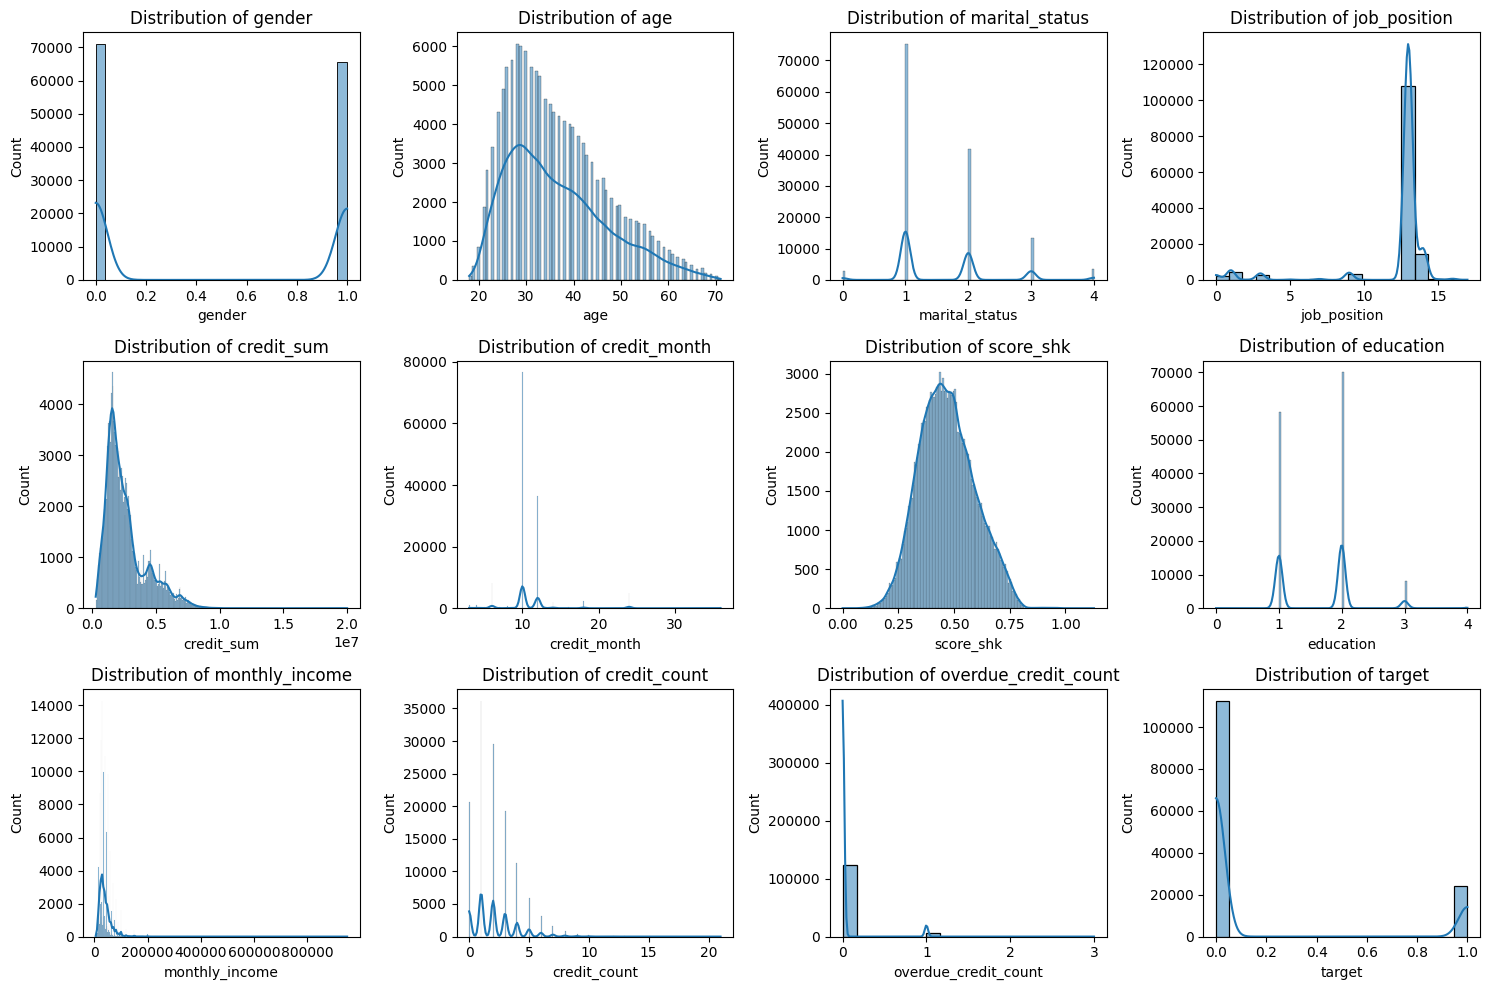

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = credit_df.columns.tolist()

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(credit_df[column], kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [10]:
credit_df["target"].value_counts()

target
0    112551
1     24045
Name: count, dtype: int64

In [11]:
credit_df.corr()["target"]

gender                  0.043253
age                    -0.029472
marital_status          0.043813
job_position           -0.027669
credit_sum             -0.072157
credit_month            0.025983
score_shk               0.046624
education               0.068736
monthly_income         -0.021235
credit_count            0.035932
overdue_credit_count    0.022985
target                  1.000000
Name: target, dtype: float64

In [12]:
credit_df = credit_df.dropna()

credit_df.isnull().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
score_shk               0
education               0
monthly_income          0
credit_count            0
overdue_credit_count    0
target                  0
dtype: int64

In [14]:
class_0 = credit_df[credit_df['target'] == 0]
class_1 = credit_df[credit_df['target'] == 1]

# Balance the classes by undersampling the larger class
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)

# Combine both classes
balanced_data = pd.concat([class_0_balanced, class_1])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data["target"].value_counts()

target
0    21288
1    21288
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(balanced_data.drop("target", axis=1))
y = balanced_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

for model in models:

    name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model: ", name)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("----------------------------------------------------")

    

Model:  LogisticRegression
Accuracy:  0.5537811178957257
Precision:  0.5380656229894918
Recall:  0.6038507821901323
F1 Score:  0.5690632796552506
Confusion Matrix:  [[2207 2154]
 [1646 2509]]
----------------------------------------------------
Model:  RandomForestClassifier
Accuracy:  0.6019257867543447
Precision:  0.5889328063241107
Recall:  0.609626955475331
F1 Score:  0.5991012298959318
Confusion Matrix:  [[2593 1768]
 [1622 2533]]
----------------------------------------------------
Model:  KNeighborsClassifier
Accuracy:  0.5597698449976515
Precision:  0.5481042654028436
Recall:  0.5566787003610109
F1 Score:  0.5523582089552239
Confusion Matrix:  [[2454 1907]
 [1842 2313]]
----------------------------------------------------
Model:  DecisionTreeClassifier
Accuracy:  0.5477923907937999
Precision:  0.5355472404115996
Recall:  0.5511432009626955
F1 Score:  0.5432333056576919
Confusion Matrix:  [[2375 1986]
 [1865 2290]]
----------------------------------------------------


In [20]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    use_label_encoder=False,      # Avoids label encoding warnings
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6122592766557069
Precision: 0.601668653158522
Recall: 0.6074608904933815
F1 Score: 0.6045508982035929
Confusion Matrix:
 [[2690 1671]
 [1631 2524]]


In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, random_state=42),
    param_grid=params,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy: 0.6082667919210897
Precision: 0.5859391395592864
Recall: 0.6719614921780986
F1 Score: 0.6260089686098654
Confusion Matrix:
 [[2388 1973]
 [1363 2792]]


In [22]:
credit_df["target"].value_counts()

target
0    107942
1     21288
Name: count, dtype: int64

In [24]:
credit_df = credit_df.drop_duplicates()

credit_df.duplicated().sum()

0

In [25]:
credit_df.corr()["target"]

gender                  0.034648
age                     0.006801
marital_status          0.031297
job_position           -0.028886
credit_sum             -0.077049
credit_month            0.022148
score_shk               0.035602
education               0.055216
monthly_income         -0.014094
credit_count            0.036064
overdue_credit_count    0.023083
target                  1.000000
Name: target, dtype: float64

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X = scaler.fit_transform(credit_df.drop(["age", "target", "job_position", "monthly_income"], axis=1))
y = credit_df["target"]


smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



models = [XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',       
    use_label_encoder=False,     
    random_state=42
),RandomForestClassifier(random_state=42)]


for model in models:

    name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Model: ", name)
    print("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-------------------------------------------")



Model:  XGBClassifier
Accuracy: 0.6964344128230291
Precision: 0.7083582685018951
Recall: 0.6653550683904815
F1 Score: 0.6861835748792271
Confusion Matrix:
 [[7801 2924]
 [3572 7102]]
-------------------------------------------
Model:  RandomForestClassifier
Accuracy: 0.8005514276368054
Precision: 0.7917122040072859
Recall: 0.8144088439198052
F1 Score: 0.8029001570148703
Confusion Matrix:
 [[8438 2287]
 [1981 8693]]
-------------------------------------------
